# Summary
- Explanatory Analysis of the data to see the different Distributions of Data
- Visualizations to understand the distributions
- Identifying Key points to place EV stations
- Modelling

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
!pip install deap


In [33]:
!pip install geopandas

import math
import pandas as pd
import geopandas as gpd
import random

import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

from deap import base, creator, tools, algorithms
from shapely.geometry import Point, Polygon

In [34]:
# Specify the directory containing the shapefiles
directory = '/content/drive/MyDrive/Final data/'
directory2='/content/drive/MyDrive/Final new data/'


In [35]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **1. EDA about Roads**

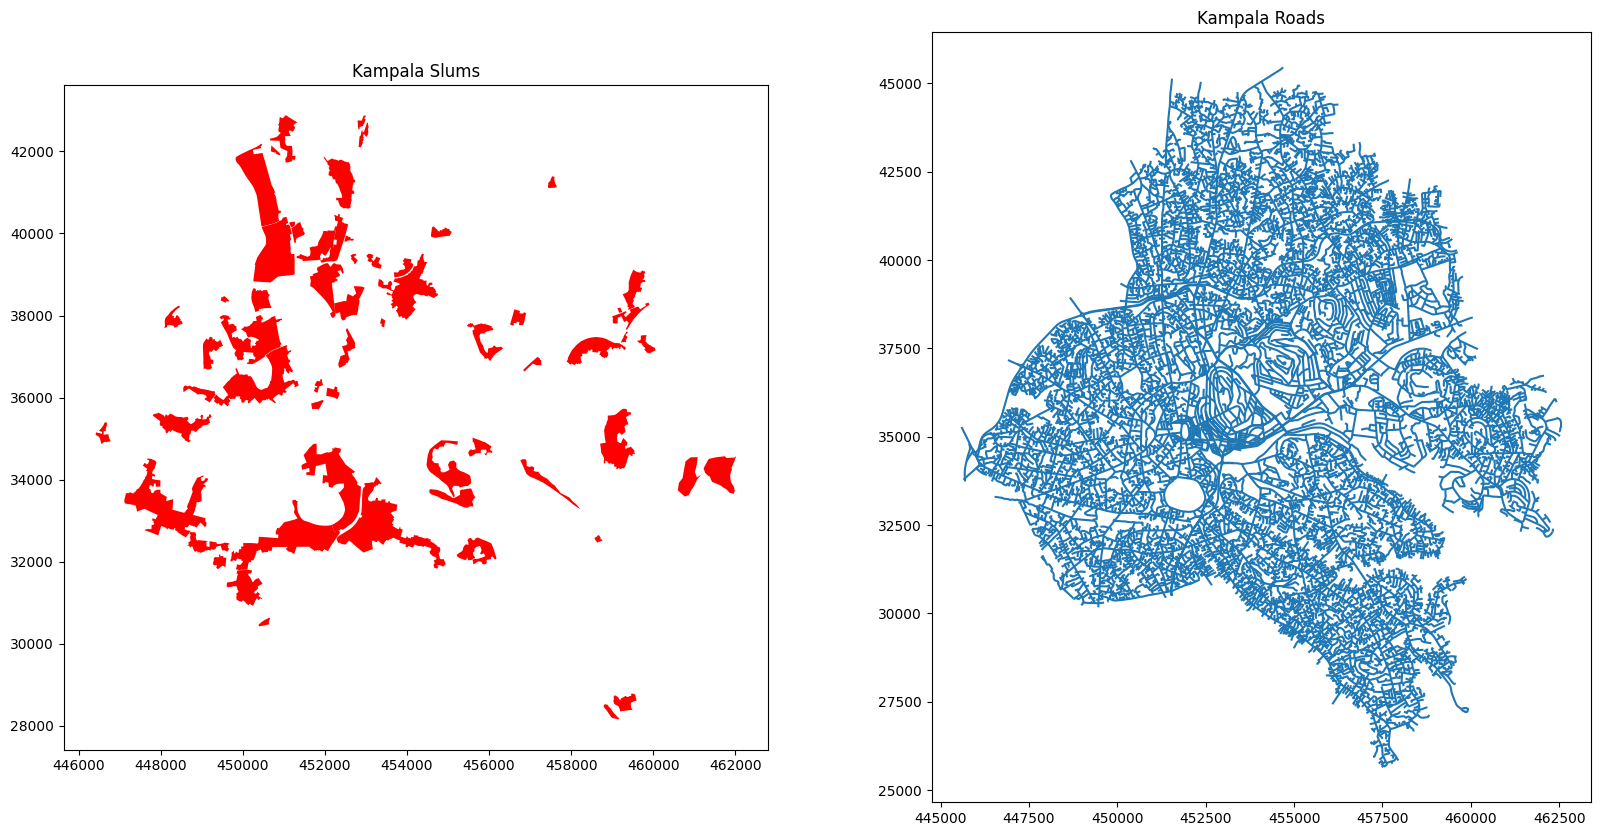

In [36]:


# Set the file path to your geospatial data folder
data_folder = '/content/drive/MyDrive/Final data/'

# Define the file names for the specific data you want to use
shapefile_name = 'Kampala_Roads_KCCA_2023.shp'
shapefile_name2 = 'Kampala_Slums_KCCA_2014.shp'

# Load the slams data using Geopandas
slams = gpd.read_file(data_folder + shapefile_name2)

# Load the shapefile data using Geopandas
shapefile = gpd.read_file(data_folder + shapefile_name)

# Create subplots in a single figure
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

# Plot the slams data in the first subplot (left)
slams.plot(ax=axes[0], color='r')
axes[0].set_title("Kampala Slums")

# Plot the shapefile data in the second subplot (right)
shapefile.geometry.plot(ax=axes[1])
axes[1].set_title("Kampala Roads")

# Display the figure
plt.show()


- The plots show the distribution of Kampala Slums where we can see that most slums are concentrated on the outskirt divisions.
- The second Plot shows the distribution of Kampala roads in all Divisions.

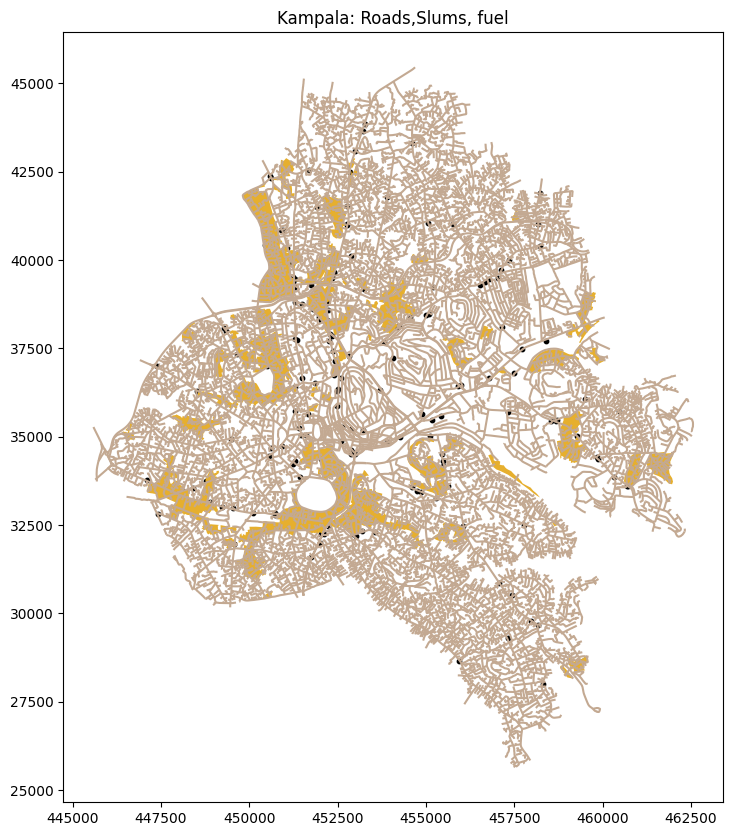

In [37]:
# Set the file path to your geospatial data folder
data_folder = '/content/drive/MyDrive/Final data/'

# Define the file names for the specific data you want to use
sahpefile_name1 = 'Kampala_Roads_KCCA_2023.shp'
shapefile_name2 = 'Kampala_Slums_KCCA_2014.shp'
shapefile_name3='Fuel_Filling_Stations_OSM_2022.shp'
shapefile_name4= 'Kampala_Divisions_KCCA,UBOS,MoLHUD_2014.shp'
shapefile_name5= 'BodaBoda_Stages_KCCA_2023.shp'
shapefile_name6= 'Kampala_Formal_Houses_KCCA_2022.shp'
shapefile_name7= 'Kampala_Informal_Houses.shp'

# Load the slams data using Geopandas
slams = gpd.read_file(data_folder + shapefile_name2)

# Load the roads data using Geopandas
roads = gpd.read_file(data_folder + sahpefile_name1)
fuel=gpd.read_file(data_folder + shapefile_name3)
Kampala_Divisions_KCCA=gpd.read_file(data_folder + shapefile_name4)
BodaBoda_stages=gpd.read_file(data_folder + shapefile_name5)
Formal_Houses=gpd.read_file(data_folder + shapefile_name6)
Informal_Houses=gpd.read_file(data_folder + shapefile_name7)

# Create a plot and axis
fig, ax = plt.subplots(figsize=(10, 10))
colors = ['#E6AF2E', '#CBBEA1', '#D9BF77', '#A89F91', '#C3A992']

# Plot the roads data

# Plot the slams data on top of the roads data
fuel.plot(ax=ax,color='black',markersize=10)
slams.plot(ax=ax, color='#E6AF2E', markersize=10)
roads.plot(ax=ax,color='#C3A992')

# Set the title
plt.title("Kampala: Roads,Slums, fuel")

# Save the figure as an image (e.g., PNG format)
plt.savefig('example_plot.png', dpi=300, bbox_inches='tight')

In [38]:
roads

,Entity,Layer,Color,Linetype,Elevation,LineWt,RefName,Length,ROAD_NAME,DIVISION,...,Shape_Area,Database_N,Roadname,Type_,Road_Na,RdNameCode,Sym_Roads,Length_Mtr,Road_Class,geometry
0,LWPolyline,Paved Roads,7,Continuous,0.0,13,None,0.084378,Wilson Lane,Central,...,7791.829472,NoName,None,Unknown,None,NAKASERO IV 1,None,84,None,"LINESTRING Z (452813.421 34992.24 0, 452820.58..."
1,LWPolyline,Paved Roads,7,Continuous,0.0,13,None,0.047669,Kitaka MTK Lane,Central,...,10000.000000,NoName,None,Unknown,None,CIVIC CENTER 3,Nasser Lane,48,None,"LINESTRING Z (453615.049 34738.199 0, 453622.0..."
2,LWPolyline,Paved Roads,7,Continuous,0.0,13,None,0.141278,Suuni Lane,Central,...,9940.450177,NoName,None,Unknown,None,OLD KAMPALA 7,Omara Samuel Lane,141,None,"LINESTRING Z (452089.825 35522.774 0, 452094.7..."
3,LWPolyline,Paved Roads,7,Continuous,0.0,13,None,0.128068,Nana Close,Central,...,6733.351821,NoName,None,Unknown,None,KAGUGUBE 8,None,128,None,"LINESTRING Z (451683.301 36168.244 0, 451687.5..."
4,LWPolyline,Paved Roads,7,Continuous,0.0,13,None,0.255743,Ben Kiwanuka Okot Close,Central,...,4159.111143,No Name,None,Close,None,Ben Kiwanuka Okot Close,None,256,None,"LINESTRING Z (454900.028 38523.669 0, 454892.2..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7744,LWPolyline,Unpaved Roads,30,Continuous,0.0,13,None,158.495497,Baruga Paul Close,Makindye,...,10000.000000,NoName,None,Unknown,None,Noelina Close,None,158,None,"LINESTRING Z (457647.946 33592.861 0, 457645.8..."
7745,LWPolyline,Unpaved Roads,30,Continuous,0.0,13,None,78.458102,Nshekanabo Close,Makindye,...,9432.914157,NoName,None,Unknown,None,SALAAMA 9351,None,111,None,"LINESTRING Z (457340.126 27105.977 0, 457344.0..."
7746,LWPolyline,Unpaved Roads,30,Continuous,0.0,13,None,223.986607,Bbosa Sulah Close,Nakawa,...,10000.000000,NoName,None,Close,None,Namugera Close,None,224,None,"LINESTRING Z (455626.897 43721.758 0, 455660.8..."
7747,LWPolyline,Unpaved Roads,30,Continuous,0.0,13,None,68.648321,Kinyata T. Close,Makindye,...,10000.000000,NoName,None,Unknown,None,Musoke James Close 9295,NoName,69,None,"LINESTRING Z (457047.277 27176.474 0, 457082.1..."


In [39]:
roads.drop(["RefName","Roadname"],axis=1,inplace=True)

In [40]:
roads.isna().sum()

,0
Entity,70
Layer,79
Color,0
Linetype,70
Elevation,0
LineWt,0
Length,0
ROAD_NAME,14
DIVISION,6
Named,20


In [41]:
%%capture
# Install relevant libraries
!pip install geopandas folium

In [42]:

from shapely.geometry import Point, LineString
import geopandas as gpd
from shapely.geometry import Point
from shapely.geometry import LineString
import folium

In [43]:
# roads.dropna(inplace=True)

In [44]:
roads

,Entity,Layer,Color,Linetype,Elevation,LineWt,Length,ROAD_NAME,DIVISION,Named,...,Shape_Leng,Shape_Area,Database_N,Type_,Road_Na,RdNameCode,Sym_Roads,Length_Mtr,Road_Class,geometry
0,LWPolyline,Paved Roads,7,Continuous,0.0,13,0.084378,Wilson Lane,Central,No,...,357.838575,7791.829472,NoName,Unknown,None,NAKASERO IV 1,None,84,None,"LINESTRING Z (452813.421 34992.24 0, 452820.58..."
1,LWPolyline,Paved Roads,7,Continuous,0.0,13,0.047669,Kitaka MTK Lane,Central,No,...,400.000000,10000.000000,NoName,Unknown,None,CIVIC CENTER 3,Nasser Lane,48,None,"LINESTRING Z (453615.049 34738.199 0, 453622.0..."
2,LWPolyline,Paved Roads,7,Continuous,0.0,13,0.141278,Suuni Lane,Central,No,...,394.351583,9940.450177,NoName,Unknown,None,OLD KAMPALA 7,Omara Samuel Lane,141,None,"LINESTRING Z (452089.825 35522.774 0, 452094.7..."
3,LWPolyline,Paved Roads,7,Continuous,0.0,13,0.128068,Nana Close,Central,No,...,357.604640,6733.351821,NoName,Unknown,None,KAGUGUBE 8,None,128,None,"LINESTRING Z (451683.301 36168.244 0, 451687.5..."
4,LWPolyline,Paved Roads,7,Continuous,0.0,13,0.255743,Ben Kiwanuka Okot Close,Central,Yes,...,284.211037,4159.111143,No Name,Close,None,Ben Kiwanuka Okot Close,None,256,None,"LINESTRING Z (454900.028 38523.669 0, 454892.2..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7744,LWPolyline,Unpaved Roads,30,Continuous,0.0,13,158.495497,Baruga Paul Close,Makindye,No,...,400.000000,10000.000000,NoName,Unknown,None,Noelina Close,None,158,None,"LINESTRING Z (457647.946 33592.861 0, 457645.8..."
7745,LWPolyline,Unpaved Roads,30,Continuous,0.0,13,78.458102,Nshekanabo Close,Makindye,No,...,380.712946,9432.914157,NoName,Unknown,None,SALAAMA 9351,None,111,None,"LINESTRING Z (457340.126 27105.977 0, 457344.0..."
7746,LWPolyline,Unpaved Roads,30,Continuous,0.0,13,223.986607,Bbosa Sulah Close,Nakawa,Yes,...,400.000000,10000.000000,NoName,Close,None,Namugera Close,None,224,None,"LINESTRING Z (455626.897 43721.758 0, 455660.8..."
7747,LWPolyline,Unpaved Roads,30,Continuous,0.0,13,68.648321,Kinyata T. Close,Makindye,No,...,400.000000,10000.000000,NoName,Unknown,None,Musoke James Close 9295,NoName,69,None,"LINESTRING Z (457047.277 27176.474 0, 457082.1..."


In [45]:
# # Create a Folium map centered at a specific location
# map_center = [roads.geometry.centroid.y.mean(), roads.geometry.centroid.x.mean()]
# mymap = folium.Map(location=map_center, zoom_start=11)

# # Iterate through the GeoDataFrame and add LineString objects to the map
# for idx, row in roads.iterrows():
#     folium.GeoJson(row['geometry']).add_to(mymap)

# # # Display the map
# mymap
# map_center

ValueError: Cannot render objects with any missing geometries: None


- <span style="color:maroon">Maroon Regions:</span> These represent the roads within Kampala.
- <span style="color:#C3A992">Black dots:</span> These represent the Fuel stations.
- <span style="color:#E6AF2E">Brown Points:</span> These are the slums in kamapala.

 **Modern Roads: with pavets**

📗 **Observation**:when you look at the formal and the informal figure you r ealised that within the central there are tones of modern houses hence good roads

**Sugestion:**: Further investigation of the **Roads** data

In [46]:
roads.Length_Mtr.describe()

,Length_Mtr
count,7749.000000
mean,262.216286
std,547.534436
min,0.000000
25%,91.000000
50%,149.000000
75%,261.000000
max,24350.000000


**we are going to target those roads having more than 3 killometers**

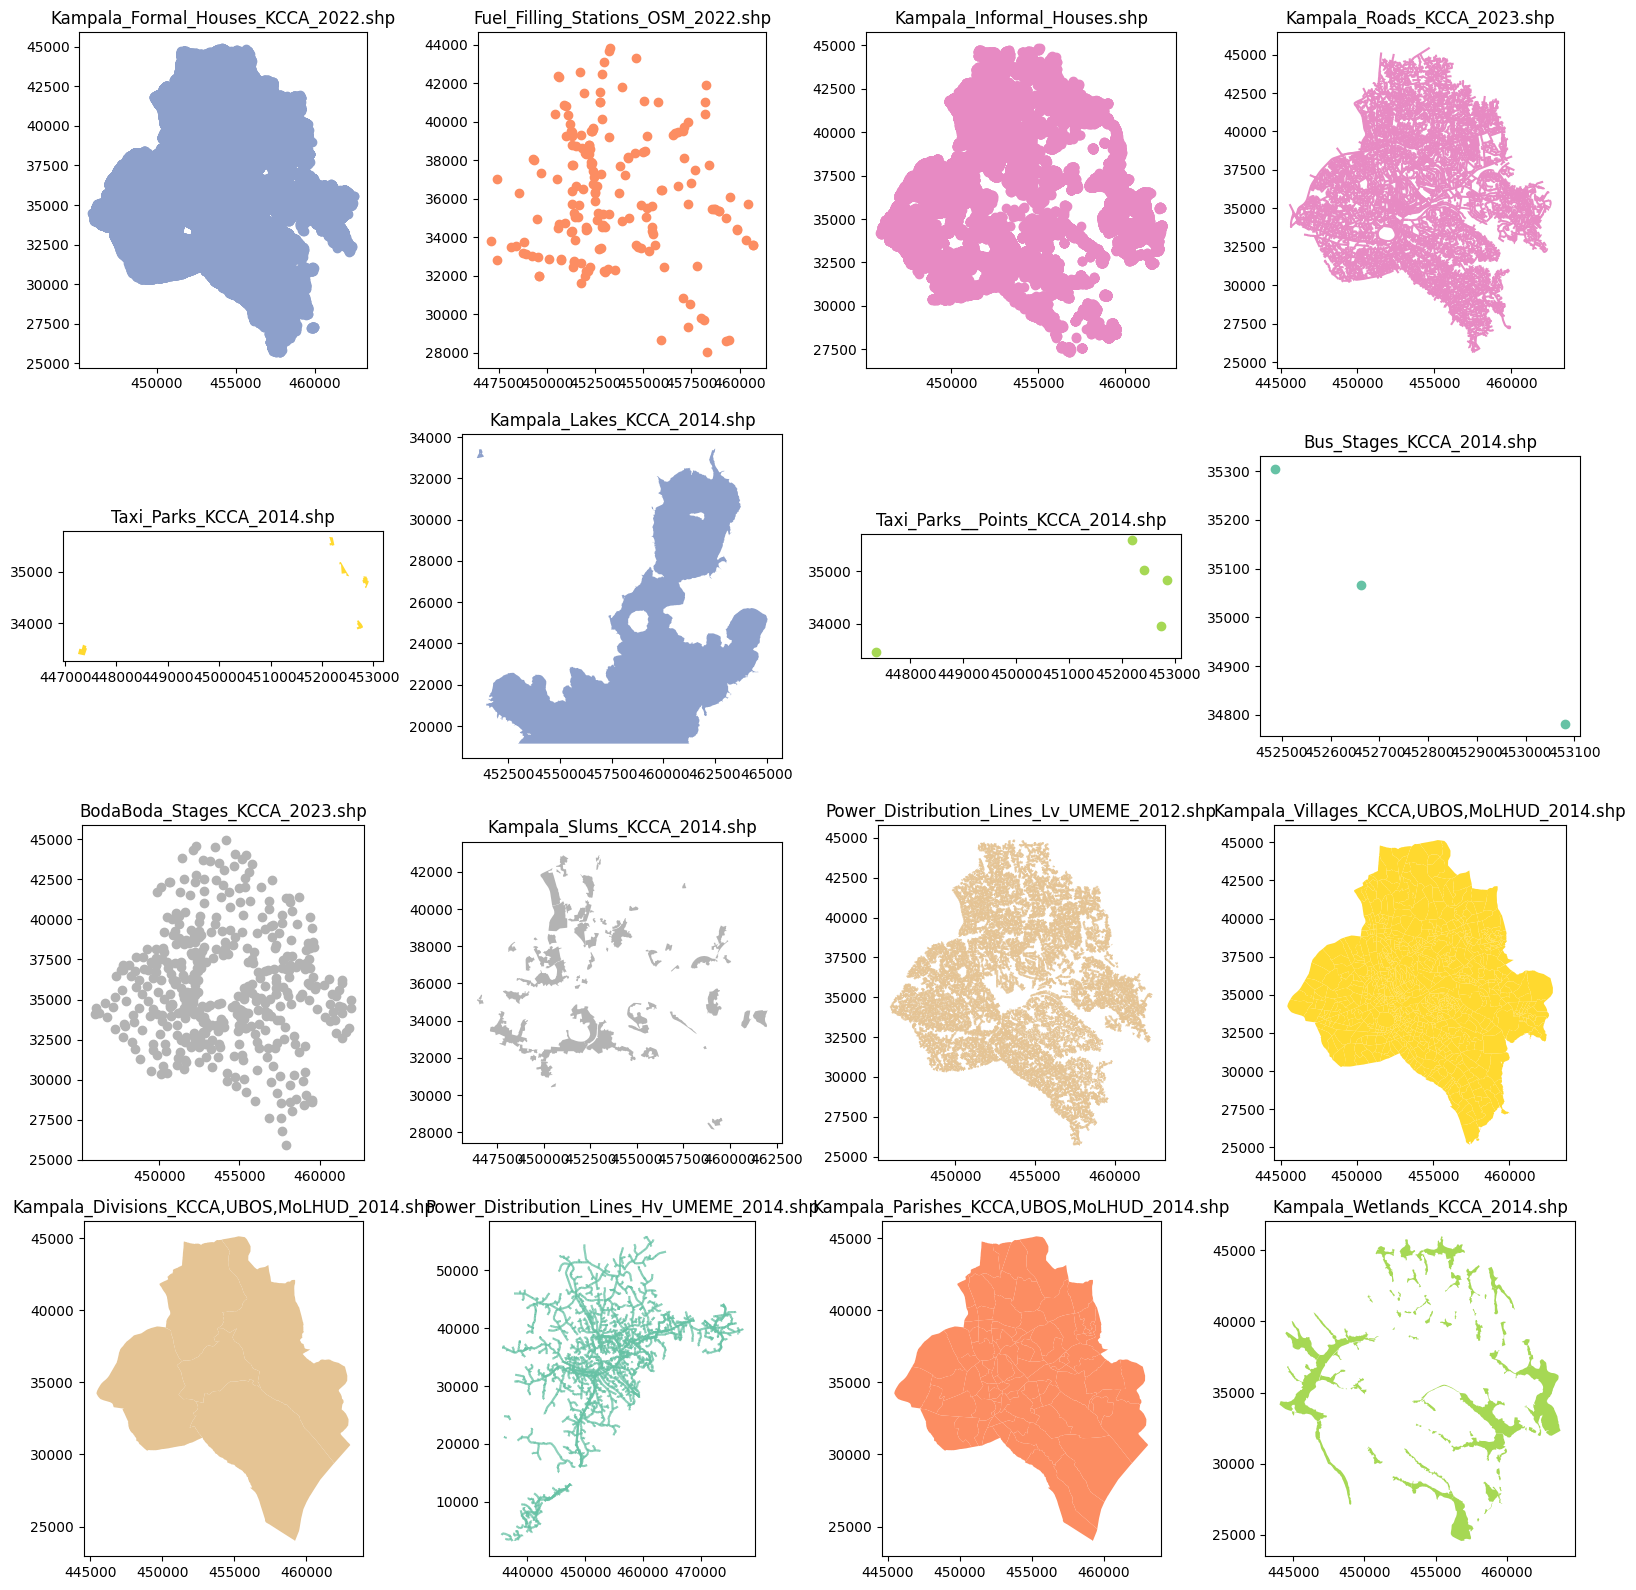

In [47]:

# Set the directory path to your geospatial data folder
data_folder = '/content/drive/MyDrive/Final data/'

# Define a list of shapefile names
shapefile_names = [
    'Kampala_Formal_Houses_KCCA_2022.shp',
    'Fuel_Filling_Stations_OSM_2022.shp',
    'Kampala_Informal_Houses.shp',
    'Kampala_Roads_KCCA_2023.shp',
    'Taxi_Parks_KCCA_2014.shp',
    'Kampala_Lakes_KCCA_2014.shp',
    'Taxi_Parks__Points_KCCA_2014.shp',
    'Bus_Stages_KCCA_2014.shp',
    'BodaBoda_Stages_KCCA_2023.shp',
    'Kampala_Slums_KCCA_2014.shp',
    'Power_Distribution_Lines_Lv_UMEME_2012.shp',
    'Kampala_Villages_KCCA,UBOS,MoLHUD_2014.shp',
    'Kampala_Divisions_KCCA,UBOS,MoLHUD_2014.shp',
    'Power_Distribution_Lines_Hv_UMEME_2014.shp',
    'Kampala_Parishes_KCCA,UBOS,MoLHUD_2014.shp',
    'Kampala_Wetlands_KCCA_2014.shp'
]

# Define the number of rows and columns for the grid
num_rows = 4
num_cols = 4

# Create a figure with subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(16, 16))

# Flatten the axes array for easy iteration
axes = axes.ravel()

# Define a modern color palette using seaborn
modern_palette = sns.color_palette("Set2", n_colors=len(shapefile_names))

# Shuffle the color palette to assign colors randomly
random.shuffle(modern_palette)

# Loop through the shapefile names and plot each one in a subplot
for i, shapefile_name in enumerate(shapefile_names):
    # Load the shapefile data using GeoPandas
    gdf = gpd.read_file(data_folder + shapefile_name)

    # Plot the data on the current subplot with a random color from the palette
    gdf.plot(ax=axes[i], aspect='equal', color=modern_palette[i])

    # Set the title for the subplot
    axes[i].set_title(shapefile_name)

# Remove any empty subplots if the number of shapefiles is less than the number of subplots
for i in range(len(shapefile_names), num_rows * num_cols):
    fig.delaxes(axes[i])

# Adjust subplot layout
plt.tight_layout()


# Save the figure as an image (e.g., PNG format)
plt.savefig('geodataKampala.png', dpi=300, bbox_inches='tight')


## **1. EDA petrol stations data**

In [48]:
fuel.head()

,osm_id,code,fclass,name,geometry
0,294017593,5250,fuel,Hass Petrol station,POINT (447098.439 33788.927)
1,294017595,5250,fuel,None,POINT (449656.768 37353.486)
2,294017600,5250,fuel,Kobil,POINT (452481.465 35875.89)
3,294022801,5250,fuel,Shell,POINT (453230.99 35185.417)
4,294022813,5250,fuel,Superoil,POINT (453886.358 34853.815)


In [49]:
fuel.osm_id.nunique(),fuel.code.nunique(),fuel.fclass.nunique()
fuel.drop(['osm_id', 'code', 'fclass'], axis=1)
fuel.head()

,osm_id,code,fclass,name,geometry
0,294017593,5250,fuel,Hass Petrol station,POINT (447098.439 33788.927)
1,294017595,5250,fuel,None,POINT (449656.768 37353.486)
2,294017600,5250,fuel,Kobil,POINT (452481.465 35875.89)
3,294022801,5250,fuel,Shell,POINT (453230.99 35185.417)
4,294022813,5250,fuel,Superoil,POINT (453886.358 34853.815)


Coclusion:

    - There are 180 different petrol stations:
    - with 64 missing names

 # **2. EDA KAMPALA DIVISION**

In [50]:
Kampala_Divisions_KCCA.head()

,Division,Area_SqKMs,geometry
0,Central,15.092226,"POLYGON ((454085.271 38768.877, 454100.42 3876..."
1,Kawempe,30.822625,"POLYGON ((454148.329 44907.62, 454188.534 4482..."
2,Makindye,55.027773,"POLYGON ((456369.167 35090.291, 456342.004 350..."
3,Nakawa,56.674261,"POLYGON ((454214.805 39118.759, 454234.172 390..."
4,Rubaga,37.480110,"POLYGON ((449654.411 38888.155, 449677.447 388..."


In [51]:
for col in Kampala_Divisions_KCCA.columns:
  print(f'{col}:{Kampala_Divisions_KCCA[col].nunique()} unique')

Division:5 unique
Area_SqKMs:5 unique
geometry:5 unique


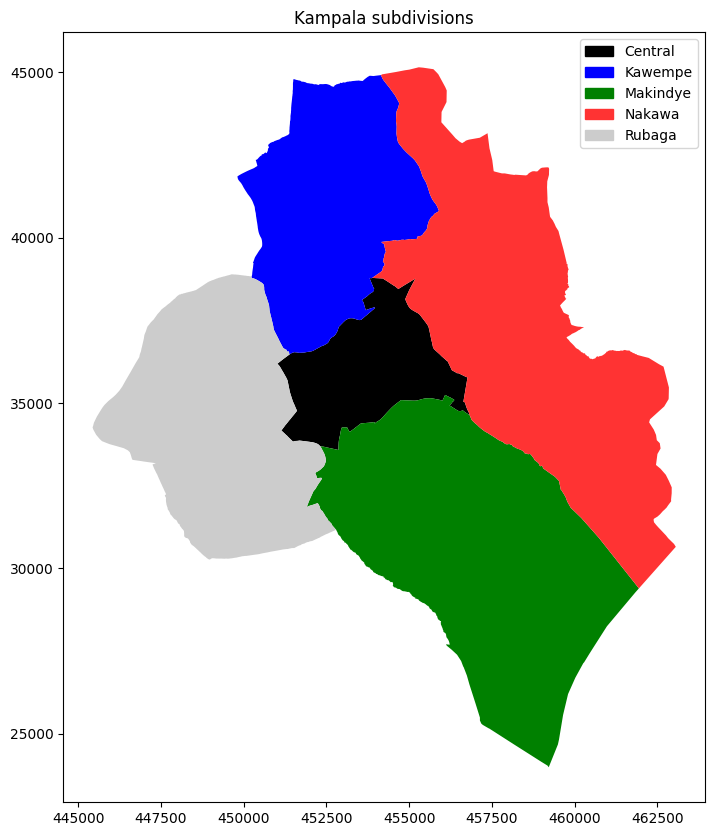

In [52]:
fig, ax = plt.subplots(figsize=(10, 10))

# roads[roads.Length_Mtr > 1500].plot(ax=ax, color='#f9f9f9')
Kampala_Divisions_KCCA.iloc[[0]].plot(ax=ax, color='black')
Kampala_Divisions_KCCA.iloc[[1]].plot(ax=ax, color='blue')
Kampala_Divisions_KCCA.iloc[[2]].plot(ax=ax, color='green')
Kampala_Divisions_KCCA.iloc[[3]].plot(ax=ax, color='#FF3333')
Kampala_Divisions_KCCA.iloc[[4]].plot(ax=ax, color='#CCC')
plt.title('Kampala subdivisions')
colors=['black','blue','green','#FF3333','#CCC']
# Create a legend based on the divisions and colors
legend_labels = Kampala_Divisions_KCCA['Division']
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=colors[i]) for i in range(len(legend_labels))]
plt.legend(legend_handles, legend_labels, loc="best")

# Replace NaN values in the "name" column with "unknown"
fuel['name'] = fuel['name'].fillna('unknown')

**let us calculate number of petrol station per division**

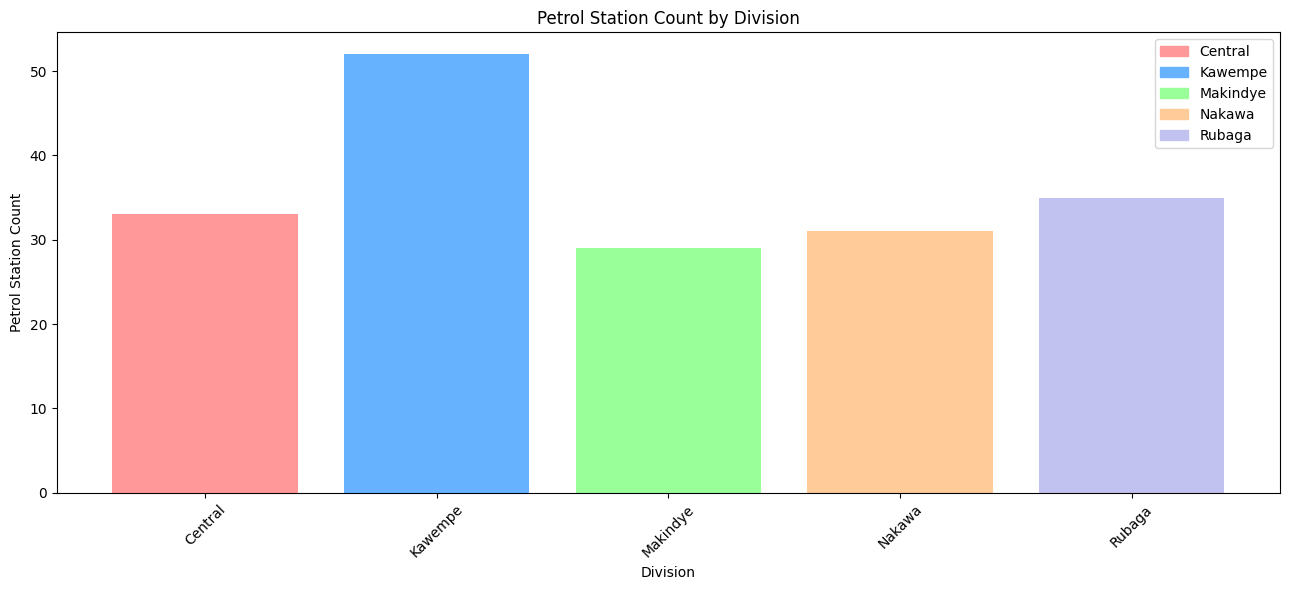

In [54]:
# Perform a spatial join to count petrol stations in each division
petrol_stations_per_division = gpd.sjoin(fuel, Kampala_Divisions_KCCA)

# Group and count the petrol stations by division
station_counts = petrol_stations_per_division.groupby('Division')['name'].count().reset_index()

# Rename the columns for clarity
station_counts.columns = ['Division', 'PetrolStationCount']


# Define colors for each division
# colors = ['red', 'blue', 'green', 'purple', 'orange']
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#c2c2f0']



# Plot the data as a bar plot with custom colors
fig, ax = plt.subplots(figsize=(13, 6))
bars = plt.bar(station_counts['Division'], station_counts['PetrolStationCount'], color=colors)
plt.xlabel('Division')
plt.ylabel('Petrol Station Count')
plt.title('Petrol Station Count by Division')

# Create a legend based on the divisions and colors
legend_labels = station_counts['Division']
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=colors[i]) for i in range(len(legend_labels))]
plt.legend(legend_handles, legend_labels)

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

In [55]:
station_counts,station_counts.PetrolStationCount.sum()

(   Division  PetrolStationCount
 0   Central                  33
 1   Kawempe                  52
 2  Makindye                  29
 3    Nakawa                  31
 4    Rubaga                  35,
 np.int64(180))

**let us calculate number of boda boda stages per division**

In [56]:
BodaBoda_stages.shape

(429, 26)

In [57]:
for col in BodaBoda_stages.columns:
  print(f'{col}: {BodaBoda_stages[col].nunique()} unique, missing values:{BodaBoda_stages[col].isnull().sum()}')

OBJECTID: 354 unique, missing values:0
WardAdmin: 18 unique, missing values:133
Passcode: 19 unique, missing values:0
Lat: 295 unique, missing values:0
Long: 295 unique, missing values:0
Division: 5 unique, missing values:122
Parish: 74 unique, missing values:122
Zone: 2 unique, missing values:133
Village: 167 unique, missing values:205
Village1: 65 unique, missing values:355
Street: 2 unique, missing values:133
Street1: 101 unique, missing values:238
Street2: 75 unique, missing values:339
StageName: 251 unique, missing values:165
BodaNumber: 30 unique, missing values:0
Gazette: 2 unique, missing values:133
Field18: 5 unique, missing values:423
Field20: 3 unique, missing values:426
New_Stage_: 5 unique, missing values:424
Chairrman_: 5 unique, missing values:424
Contact: 5 unique, missing values:424
Property_O: 1 unique, missing values:428
Road_Reser: 4 unique, missing values:425
Location: 2 unique, missing values:424
Plot: 2 unique, missing values:426
geometry: 426 unique, missing val

In [58]:
BodaBoda_stages.Division.value_counts()

,count
Division,
NAKAWA,80
MAKINDYE,78
RUBAGA,76
KAWEMPE,47
CENTRAL,26


In [59]:
BodaBoda_stages=BodaBoda_stages.dropna(axis=1)
BodaBoda_stages.head()

,OBJECTID,Passcode,Lat,Long,BodaNumber,geometry
0,2,7537,0.305112,32.567145,13,POINT (451621.257 33870.874)
1,3,6657,0.306149,32.562163,10,POINT (451194.242 34132.54)
2,6,7537,0.292998,32.566758,13,POINT (451681.571 32675.107)
3,10,7537,0.294040,32.560084,10,POINT (451089.576 32762.598)
4,13,6657,0.304820,32.557905,10,POINT (450700.119 33976.751)


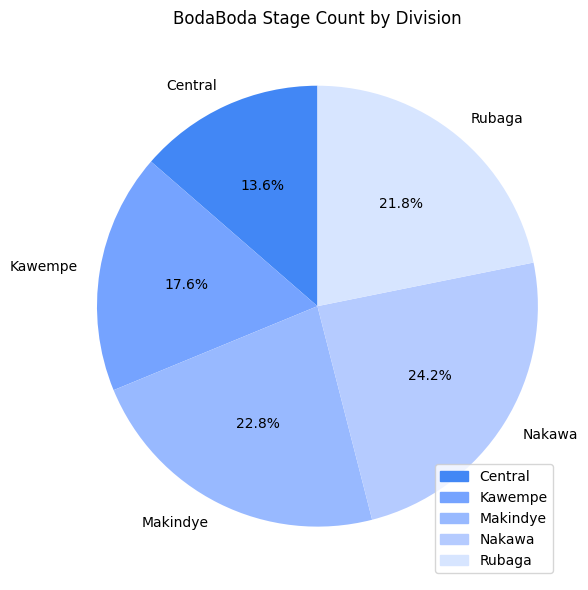

In [61]:
# Perform a spatial join to count petrol stations in each division
petrol_stations_per_division = gpd.sjoin(BodaBoda_stages, Kampala_Divisions_KCCA)

# Group and count the petrol stations by division
station_counts = petrol_stations_per_division.groupby('Division')['Lat'].count().reset_index()

# Rename the columns for clarity
station_counts.columns = ['Division', 'BodaBodaStageCount']

# Define colors for each division
# colors = ['red', 'blue', 'green', 'purple', 'orange']
colors = ['#4287f5', '#75a3ff', '#98b9ff', '#b5cbff', '#d7e5ff']


# Create a pie chart
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(station_counts['BodaBodaStageCount'], labels=station_counts['Division'], colors=colors, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('BodaBoda Stage Count by Division')

# Create a legend based on the divisions and colors
legend_labels = station_counts['Division']
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=colors[i]) for i in range(len(legend_labels))]
plt.legend(legend_handles, legend_labels, loc="best")

# Show the plot
plt.tight_layout()
plt.show()


The above pie chart shows a pie chart displaying Boda boda stage distribution.

<b>Key points:</b>
- Nakawa has highest number of stages
- Central has few boda stations.

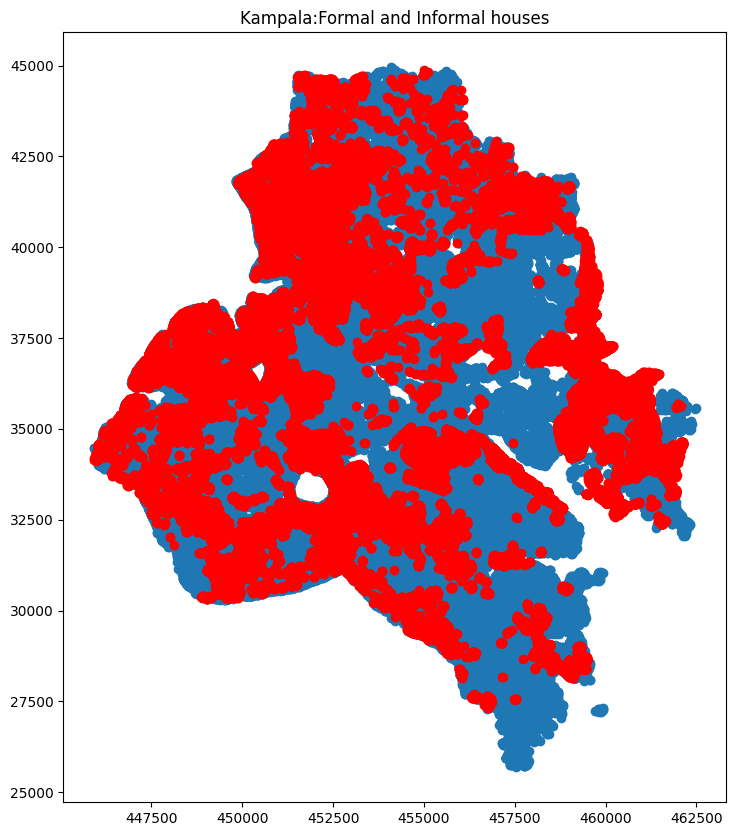

In [62]:
# Create a plot and axis
fig, ax = plt.subplots(figsize=(10, 10))

Formal_Houses.plot(ax=ax)
Informal_Houses.plot(ax=ax, color='red')

# Set the title
plt.title("Kampala:Formal and Informal houses")

plt.savefig('example_plot3.png', dpi=300, bbox_inches='tight')

- <span style="color:red">Red Regions:</span> These represent the formal houses within Kampala.
- <span style="color:blue">Blue Regions:</span> These represent the Informal Regions.

<Axes: >

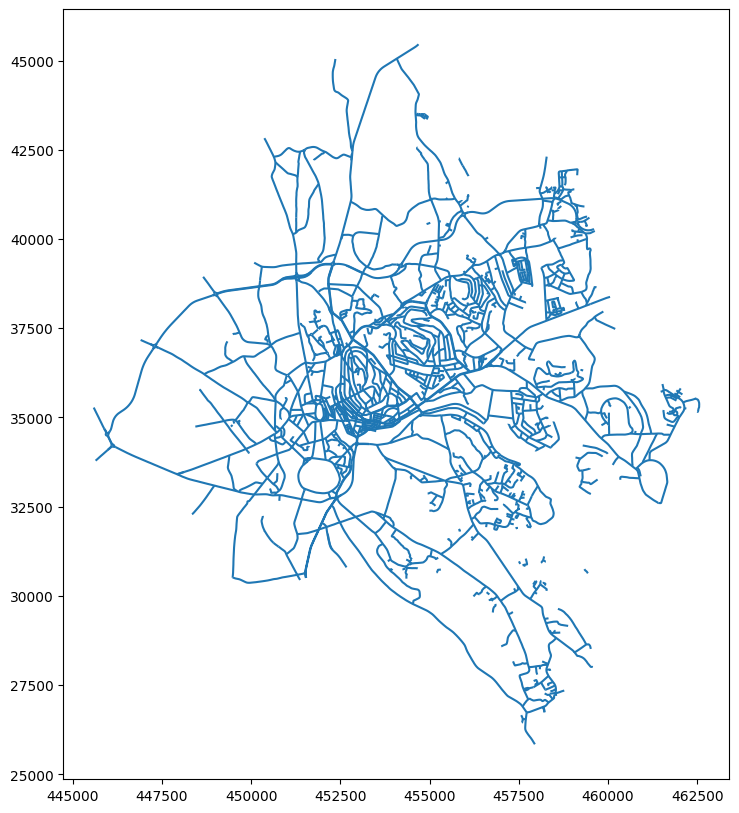

In [63]:
roads[roads.Layer == 'Paved Roads'].plot(figsize=(10,10))

# **⛽⛽ Selecting Roads having more than 2killometers in order to place petrol stations**

    - This will also be the base of the Ev charging systems

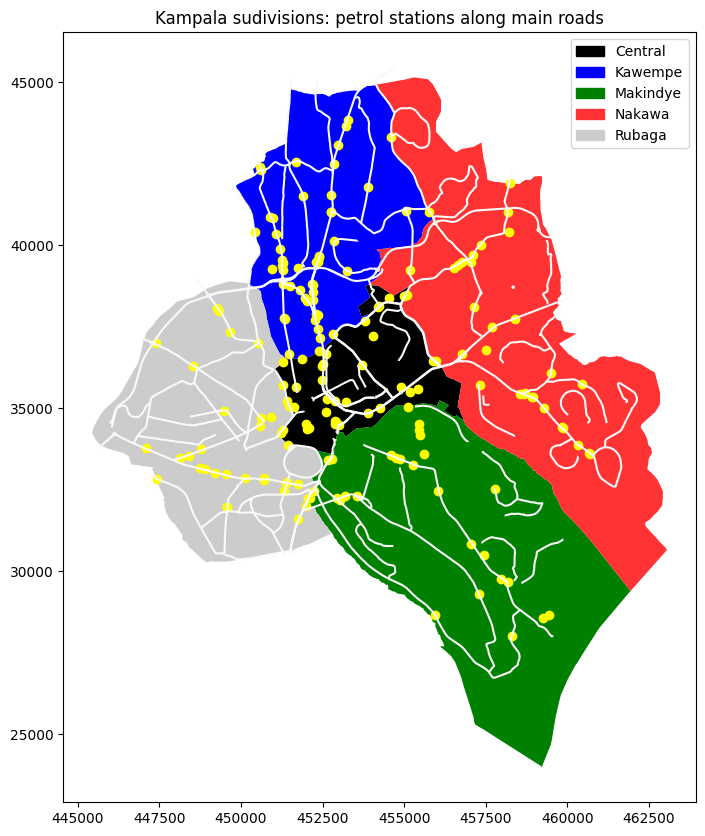

In [64]:
# Create a plot and axis
fig, ax = plt.subplots(figsize=(10, 10))

roads[roads.Length_Mtr > 2000].plot(ax=ax, color='#f9f9f9')
Kampala_Divisions_KCCA.iloc[[0]].plot(ax=ax, color='black')
Kampala_Divisions_KCCA.iloc[[1]].plot(ax=ax, color='blue')
Kampala_Divisions_KCCA.iloc[[2]].plot(ax=ax, color='green')
Kampala_Divisions_KCCA.iloc[[3]].plot(ax=ax, color='#FF3333')
Kampala_Divisions_KCCA.iloc[[4]].plot(ax=ax, color='#ccc')

fuel.plot(ax=ax, color='yellow')

# Set the title
plt.title("Kampala sudivisions: petrol stations along main roads")

colors=['black','blue','green','#FF3333','#CCC']
# Create a legend based on the divisions and colors
legend_labels = Kampala_Divisions_KCCA['Division']
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=colors[i]) for i in range(len(legend_labels))]
plt.legend(legend_handles, legend_labels, loc="best")

plt.savefig('Roads of interest.png', dpi=300, bbox_inches='tight')

- <span style="color:yellow">Yellow Regions:</span> These represent the petrol stations along roads within Kampala.

In [65]:
roads_of_interest=roads[roads.Length_Mtr > 1000]

In [66]:
roads_of_interest.shape

(245, 33)

In [67]:
for col in roads_of_interest.columns:
  print(f'{col}: {roads_of_interest[col].nunique()} unique, missing values:{roads_of_interest[col].isnull().sum()}')

Entity: 1 unique, missing values:0
Layer: 2 unique, missing values:0
Color: 2 unique, missing values:0
Linetype: 1 unique, missing values:0
Elevation: 1 unique, missing values:0
LineWt: 2 unique, missing values:0
Length: 234 unique, missing values:0
ROAD_NAME: 237 unique, missing values:0
DIVISION: 5 unique, missing values:0
Named: 2 unique, missing values:1
Road_Name_: 1 unique, missing values:244
Status: 1 unique, missing values:183
HouseNos: 43 unique, missing values:186
RoadNCode: 1 unique, missing values:244
PNAME2014: 69 unique, missing values:1
RoadCode: 234 unique, missing values:1
Code: 232 unique, missing values:1
FID_Kampal: 167 unique, missing values:0
DNAME2014: 0 unique, missing values:245
CNAME2014: 1 unique, missing values:1
SNAME2014: 5 unique, missing values:1
Villag2014: 166 unique, missing values:2
FID_Kamp_1: 226 unique, missing values:0
Shape_Leng: 207 unique, missing values:0
Shape_Area: 207 unique, missing values:0
Database_N: 180 unique, missing values:1
Type_:

In [68]:
roads_of_interest.Layer.value_counts()

,count
Layer,
Paved Roads,163
Unpaved Roads,82


<Axes: >

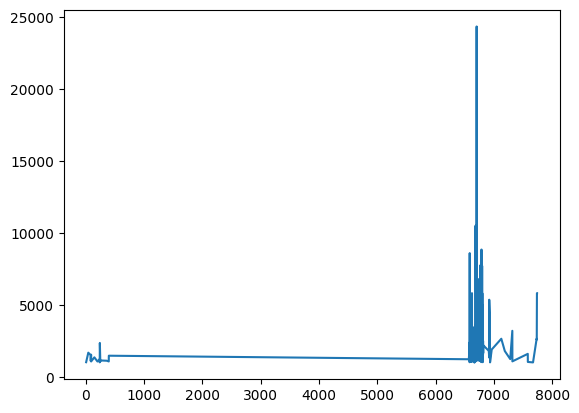

In [69]:
roads_of_interest[roads_of_interest.Layer == 'Paved Roads'].Length_Mtr.plot()

<Axes: >

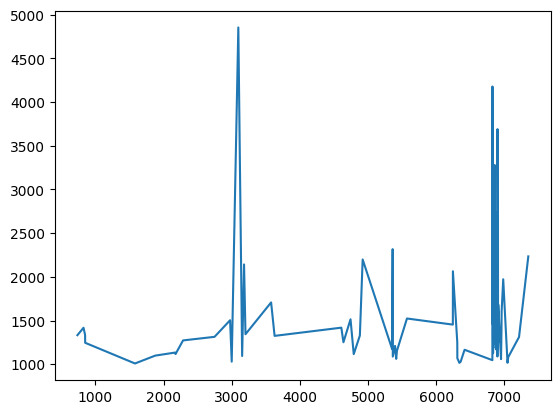

In [70]:
roads_of_interest[roads_of_interest.Layer == 'Unpaved Roads'].Length_Mtr.plot()

# **📝Observations**:
    - There are 86 roads having more than 2Killometers
    - In which 19have not pavet and 67 have
    - Those having pavets are the longer one as you can see to the above figure
    - The max kilometers of unpaved roads are 4km but likely to be paved soon

# **📄Recomendation**:
Select Features that will be used to respond to the question of:

    - Where to put Ev charging systems
    - Why there??
    - How to optimize the roads per division in order to serve the population

In [71]:
roads_of_interest['Road_Class'].fillna(roads_of_interest['Road_Class'].mode()[0] , inplace=True)
roads_of_interest=roads_of_interest.dropna(axis=1)

<ipython-input-71-477b4a0bdd97>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  roads_of_interest['Road_Class'].fillna(roads_of_interest['Road_Class'].mode()[0] , inplace=True)
<ipython-input-71-477b4a0bdd97>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  roads_of_interest['Road_Class'].fillna(roads_of_interest['Road_Class'].mode()[0] , inp

In [72]:
display(roads_of_interest.head(),roads_of_interest.shape)

,Entity,Layer,Color,Linetype,Elevation,LineWt,Length,ROAD_NAME,DIVISION,FID_Kampal,FID_Kamp_1,Shape_Leng,Shape_Area,RdNameCode,Length_Mtr,Road_Class,geometry
8,LWPolyline,Paved Roads,7,Continuous,0.0,13,0.596616,Philip Road,Central,792,21263,389.925766,9773.607159,Philip Road,1020,UC IV,"LINESTRING Z (454072.377 37075.225 0, 454063.6..."
45,LWPolyline,Paved Roads,7,Continuous,0.0,13,0.239603,Kyadondo I Road,Central,166,20712,386.240533,9712.082415,Kyadondo I Road,1682,UC IV,"MULTILINESTRING Z ((451575.039 36260.294 0, 45..."
84,LWPolyline,Paved Roads,7,Continuous,0.0,13,0.510042,Mary Stuart Road,Kawempe,347,21762,304.398920,5418.245193,MAKERERE UNIVERSITY 276,1513,UC IV,"MULTILINESTRING Z ((451571.522 37304.219 0, 45..."
87,LWPolyline,Paved Roads,7,Continuous,0.0,13,0.498906,University Road,Kawempe,733,21765,400.000000,10000.000000,MAKERERE UNIVERSITY 286,1102,UC IV,"MULTILINESTRING Z ((452201.079 36675.697 0, 45..."
93,LWPolyline,Paved Roads,7,Continuous,0.0,13,0.062671,Kisaasi Komamboga Road,Kawempe,102,29145,362.845335,7798.237853,KIKAAYA 307,1544,UC IV,"MULTILINESTRING Z ((454861.357 42217.515 0, 45..."


(245, 17)

In [73]:
for col in roads_of_interest.columns:
  if roads_of_interest[col].nunique() < 5:
     roads_of_interest=roads_of_interest.drop(col,axis=1)
  else:
    pass

roads_of_interest.columns

Index(['Length', 'ROAD_NAME', 'DIVISION', 'FID_Kampal', 'FID_Kamp_1',
       'Shape_Leng', 'Shape_Area', 'RdNameCode', 'Length_Mtr', 'Road_Class',
       'geometry'],
      dtype='object')

In [74]:
roads_of_interest.head()

,Length,ROAD_NAME,DIVISION,FID_Kampal,FID_Kamp_1,Shape_Leng,Shape_Area,RdNameCode,Length_Mtr,Road_Class,geometry
8,0.596616,Philip Road,Central,792,21263,389.925766,9773.607159,Philip Road,1020,UC IV,"LINESTRING Z (454072.377 37075.225 0, 454063.6..."
45,0.239603,Kyadondo I Road,Central,166,20712,386.240533,9712.082415,Kyadondo I Road,1682,UC IV,"MULTILINESTRING Z ((451575.039 36260.294 0, 45..."
84,0.510042,Mary Stuart Road,Kawempe,347,21762,304.398920,5418.245193,MAKERERE UNIVERSITY 276,1513,UC IV,"MULTILINESTRING Z ((451571.522 37304.219 0, 45..."
87,0.498906,University Road,Kawempe,733,21765,400.000000,10000.000000,MAKERERE UNIVERSITY 286,1102,UC IV,"MULTILINESTRING Z ((452201.079 36675.697 0, 45..."
93,0.062671,Kisaasi Komamboga Road,Kawempe,102,29145,362.845335,7798.237853,KIKAAYA 307,1544,UC IV,"MULTILINESTRING Z ((454861.357 42217.515 0, 45..."


In [75]:
roads_of_interest_KF=roads_of_interest[['ROAD_NAME','Length_Mtr','Road_Class','geometry']]

In [76]:
roads_of_interest_KF.head()

,ROAD_NAME,Length_Mtr,Road_Class,geometry
8,Philip Road,1020,UC IV,"LINESTRING Z (454072.377 37075.225 0, 454063.6..."
45,Kyadondo I Road,1682,UC IV,"MULTILINESTRING Z ((451575.039 36260.294 0, 45..."
84,Mary Stuart Road,1513,UC IV,"MULTILINESTRING Z ((451571.522 37304.219 0, 45..."
87,University Road,1102,UC IV,"MULTILINESTRING Z ((452201.079 36675.697 0, 45..."
93,Kisaasi Komamboga Road,1544,UC IV,"MULTILINESTRING Z ((454861.357 42217.515 0, 45..."


#**📑Mapping Road Congestion to numbers so that the computer can understand it**

In [77]:
dic_mapping={
    'UC I':1,
    'UC II':2,
    'UC III':3,
    'UC IIII':4,
    'UC IV':5
}
roads_of_interest_KF.Road_Class=roads_of_interest_KF.Road_Class.map(dic_mapping)
roads_of_interest_KF.Road_Class.value_counts()

/usr/local/lib/python3.11/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,count
Road_Class,
5.0,229
3.0,6
2.0,5
1.0,2
4.0,1


####**Pinting first 4 most congested roads**

In [78]:
roads_of_interest_KF[roads_of_interest_KF.Road_Class == 1]

,ROAD_NAME,Length_Mtr,Road_Class,geometry
6586,Bombo Road,8600,1.0,"MULTILINESTRING Z ((452520.817 36792.519 0, 45..."
6779,Entebbe Road,6918,1.0,"MULTILINESTRING Z ((452358.758 32726.744 0, 45..."


In [79]:
roads_of_interest_KF[roads_of_interest_KF.Road_Class == 2]


,ROAD_NAME,Length_Mtr,Road_Class,geometry
6577,Mukwano Road,1621,2.0,"MULTILINESTRING Z ((454765.292 35095.063 0, 45..."
6729,Bukoto-Ntinda Road,2864,2.0,"MULTILINESTRING Z ((456956.192 39564.604 0, 45..."
6785,Busabala Road,1945,2.0,"MULTILINESTRING Z ((452672.765 30798.003 0, 45..."
6788,Ggaba Road,8849,2.0,"LINESTRING Z (459574.627 28005.456 0, 459566.1..."
6817,Balintuma Road,1646,2.0,"LINESTRING Z (450671.731 34628.59 0, 450671.63..."


In [80]:
roads_of_interest_KF.Road_Class.value_counts()

,count
Road_Class,
5.0,229
3.0,6
2.0,5
1.0,2
4.0,1


In [81]:
roads_of_interest_KF.columns

Index(['ROAD_NAME', 'Length_Mtr', 'Road_Class', 'geometry'], dtype='object')

#**🙋‍♂️👩‍🔬🏡🏠Trying to match population(houses) density to our dataset**

In [82]:
Formal_Houses.head(50)

,geometry
0,POINT (456936 42717)
1,POINT (456088 42291)
2,POINT (455448 42363)
3,POINT (456645 41052)
4,POINT (455189 44362)
5,POINT (456965 42814)
6,POINT (456503 42160)
7,POINT (455879 40974)
8,POINT (456819 42623)
9,POINT (455517 41764)


In [88]:
Formal_Houses.Division.value_counts()

AttributeError: 'GeoDataFrame' object has no attribute 'Division'

In [ ]:
Kampala_Divisions_KCCA.columns

In [ ]:
Formal_Houses.columns

In [84]:
# Creating a GeoDataFrame from the Formal_Houses data
geometry = [Point(xy) for xy in zip(Formal_Houses["X"], Formal_Houses["Y"])]
population_gdf = gpd.GeoDataFrame(Formal_Houses, geometry=geometry)

# Ensure both GeoDataFrames have the same CRS (coordinate reference system)
population_gdf.set_crs(Kampala_Divisions_KCCA.crs, inplace=True)

# Spatial join to count the number of addresses within each division
joined_gdf = gpd.sjoin(Kampala_Divisions_KCCA, population_gdf, how="left", predicate="contains")

# Assuming 'Division' is the correct column name, if not, replace it with the correct one
population_counts = joined_gdf.groupby("Division_left").size()

population_list = population_counts.tolist()
population = pd.Series(population_list)
Kampala_Divisions_KCCA["density"]=population/ Kampala_Divisions_KCCA["Area_SqKMs"]

KeyError: 'X'

In [85]:
Kampala_Divisions_KCCA.head(6)

,Division,Area_SqKMs,geometry
0,Central,15.092226,"POLYGON ((454085.271 38768.877, 454100.42 3876..."
1,Kawempe,30.822625,"POLYGON ((454148.329 44907.62, 454188.534 4482..."
2,Makindye,55.027773,"POLYGON ((456369.167 35090.291, 456342.004 350..."
3,Nakawa,56.674261,"POLYGON ((454214.805 39118.759, 454234.172 390..."
4,Rubaga,37.480110,"POLYGON ((449654.411 38888.155, 449677.447 388..."


In [86]:
taxi_file='Taxi_Parks__Points_KCCA_2014.shp'
taxi_park_data=gpd.read_file(data_folder + taxi_file)

In [87]:
taxi_park_data.head()

,OBJECTID,Name,created_us,created_da,last_edite,last_edi_1,geometry
0,1,New Taxi Park,MARTIN,2014-09-16,MARTIN,2014-09-16,POINT (452419.506 35028.698)
1,2,USAFI Taxi Park,MARTIN,2014-09-16,MARTIN,2014-09-16,POINT (452739.329 33957.275)
2,3,Natete Taxi Park,MARTIN,2014-09-16,MARTIN,2014-09-16,POINT (447346.408 33459.79)
3,6,Old Taxi Park,MARTIN,2014-09-16,MARTIN,2014-09-16,POINT (452846.386 34822.443)
4,7,Namayiba Taxi Park,MARTIN,2014-09-16,MARTIN,2014-09-16,POINT (452198.276 35590.487)


In [ ]:
taxi_park_data=taxi_park_data[['Name', 'geometry']]

In [ ]:
taxi_park_data

In [ ]:
fuel[['name', 'geometry']]

# **MODELLING**

In [ ]:
roads = roads[roads.Length_Mtr > 2000]
taxi_parks = taxi_park_data.geometry
petrol_stations = fuel.geometry
kampala_boundary = Kampala_Divisions_KCCA.geometry.unary_union

# Constants and Parameters
POPULATION_SIZE = 20
NUM_GENERATIONS = 10
MUTATION_RATE = 0.2
NUM_CHARGING_POINTS = 150
NEARBY_RADIUS = 100  # in meters
MAX_POINTS_WITHIN_DISTANCE = 1
CHECK_DISTANCE = 1000  # 1 km in meters

random.seed(42)

# DEAP Setup
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

# Utility Functions
def points_within_distance(target, points, distance):
    """Count how many points are within a given distance from the target point."""
    return sum(1 for point in points if target.distance(point) < distance)

def nearest_petrol_station_distance(point, petrol_stations):
    """Get distance to the nearest petrol station from the point."""
    return min(point.distance(station) for station in petrol_stations)

# Fitness Evaluation
def fitness(individual, roads, taxi_parks, petrol_stations):
    total_distance = sum(nearest_petrol_station_distance(point, petrol_stations) for point in individual)

    # Apply penalty for charging point density violations
    penalty = sum(1 for point in individual if points_within_distance(point, individual, CHECK_DISTANCE) > MAX_POINTS_WITHIN_DISTANCE)
    penalized_distance = total_distance + (penalty * CHECK_DISTANCE)

    return penalized_distance,

def mutate_charging_point(ind):
    """Mutate a single charging point in the individual by replacing it with a new point near a petrol station."""
    mutated_point = generate_charging_point_near_petrol_station()
    index = random.randint(0, len(ind) - 1)
    ind[index] = mutated_point
    return ind,


# EV Point Generation
def generate_charging_point_near_petrol_station():
    station = random.choice(petrol_stations)  # Random petrol station
    angle = random.uniform(0, 360)  # Angle in degrees
    distance = random.uniform(0, NEARBY_RADIUS)  # Distance from the petrol station

    x = station.x + distance * math.cos(math.radians(angle))
    y = station.y + distance * math.sin(math.radians(angle))
    point = Point(x, y)

    # Ensure the point is within boundaries
    return point if point.within(kampala_boundary) else generate_charging_point_near_petrol_station()

# DEAP Toolbox Configuration
toolbox = base.Toolbox()
toolbox.register("individual", tools.initRepeat, creator.Individual, generate_charging_point_near_petrol_station, n=NUM_CHARGING_POINTS)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", fitness, roads=roads, taxi_parks=taxi_parks, petrol_stations=petrol_stations)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", mutate_charging_point)
toolbox.register("select", tools.selTournament, tournsize=3)

# Genetic Algorithm Execution
def run_genetic_algorithm():
    population = toolbox.population(n=POPULATION_SIZE)
    for gen in range(NUM_GENERATIONS):
        offspring = algorithms.varAnd(population, toolbox, cxpb=0.7, mutpb=MUTATION_RATE)
        fits = toolbox.map(toolbox.evaluate, offspring)
        for ind, fit in zip(offspring, fits):
            ind.fitness.values = fit
        population = toolbox.select(offspring, k=len(population))

    best_solution = tools.selBest(population, k=1)[0]
    return [(point.x, point.y) for point in best_solution]

# Execute
best_charging_points = run_genetic_algorithm()
print(best_charging_points)


In [ ]:
# Convert the best charging points to a GeoDataFrame
geometry = [Point(x, y) for x, y in best_charging_points]
charging_points_gdf = gpd.GeoDataFrame(geometry=geometry)

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the divisions in light colors
division_colors = ['black','blue','green','#FF3333','#CCC']

for idx, color in enumerate(division_colors):
    Kampala_Divisions_KCCA.iloc[[idx]].plot(ax=ax, color=color, edgecolor='black', linewidth=0.5)

# Plot the roads
roads_of_interest_KF[roads_of_interest_KF.Length_Mtr > 500].plot(ax=ax, color="#c9f9f9", label="Roads")

# Plot taxi parks if you have them as polygons; if they're points, adjust the method accordingly
taxi_parks.plot(ax=ax, color="yellow", label="Taxi Parks")  # Royal blue

# Plot petrol stations
petrol_stations.plot(ax=ax, color="white", label="Petrol Stations")  # Medium sea green

# Plot the best charging points
charging_points_gdf.plot(ax=ax, color="orange", label="Ev Charging Points")  # Orangered

# Plot the slams data in the first subplot (left)
# slams.plot(ax=ax, color='white')
# Set legend and other plot adjustments
ax.legend()
ax.set_title("Total Energy output: Distribution of EV Charging Points in Kampala")
ax.axis('off')  # Hide axes for a cleaner look

# Show the plot
plt.tight_layout()
plt.savefig('Ev charging map.png', dpi=100, bbox_inches='tight')

In [ ]:
from pyproj import Proj, transform

def utm_to_latlon(easting, northing):
    # Define the UTM and WGS84 projections
    # Note: Ensure the correct zone number and hemisphere. '36M' is assumed here, for Kampala.
    utm_proj = Proj(proj='utm', zone=36, south=True, ellps='WGS84')
    wgs_proj = Proj(proj='latlong', datum='WGS84')

    # Convert UTM to latitude and longitude
    latitude, longitude = transform(utm_proj, wgs_proj, easting, northing)

    return (latitude, longitude)


# Convert all UTM coordinates to lat-long
converted_coords = [utm_to_latlon(easting, northing) for easting, northing in best_charging_points]

for idx, (lat, lon) in enumerate(converted_coords):
    print(f'Point {idx+1}: Latitude: {lat}, Longitude: {lon}')
